## 'USAccDeaths' dataset

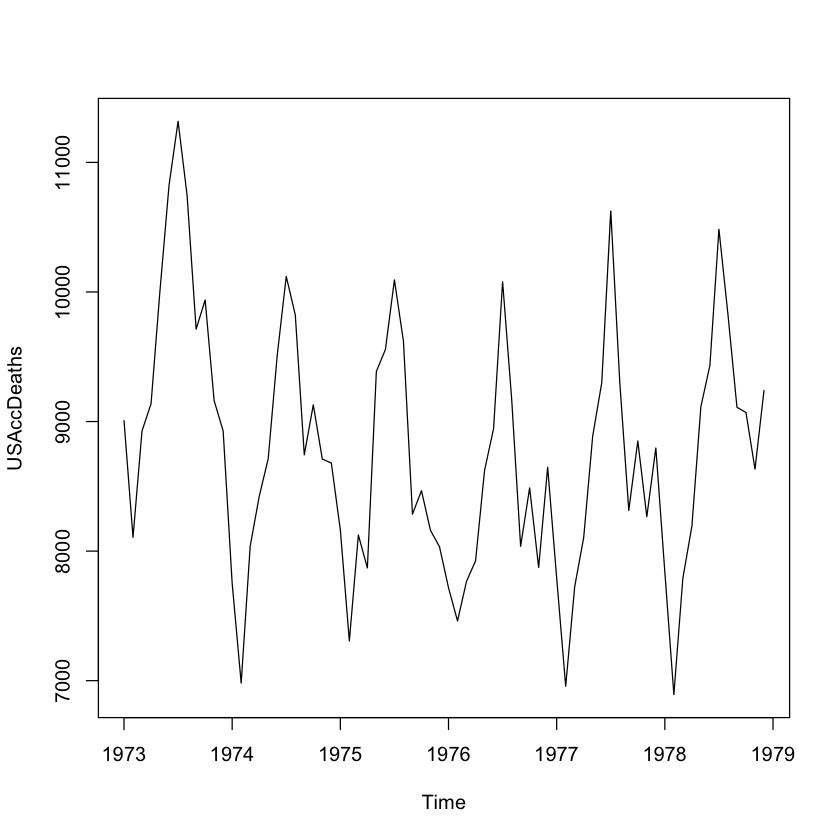

In [1]:
plot(USAccDeaths)

1. Time series is not stationary since there is a seasonal trend
2. It is a monthly time series with a span of seasonality 12. 

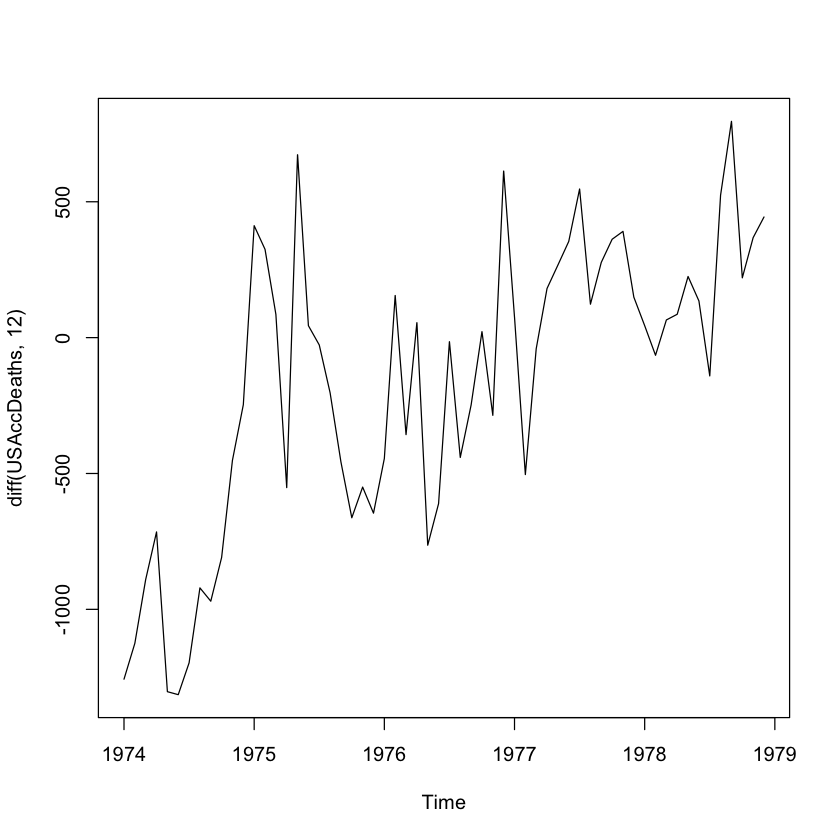

In [2]:
# We first get rid of the seasonal trend by differencing the values at the same month of each year.
plot(diff(USAccDeaths, 12))

1. There is a clear upward trend.

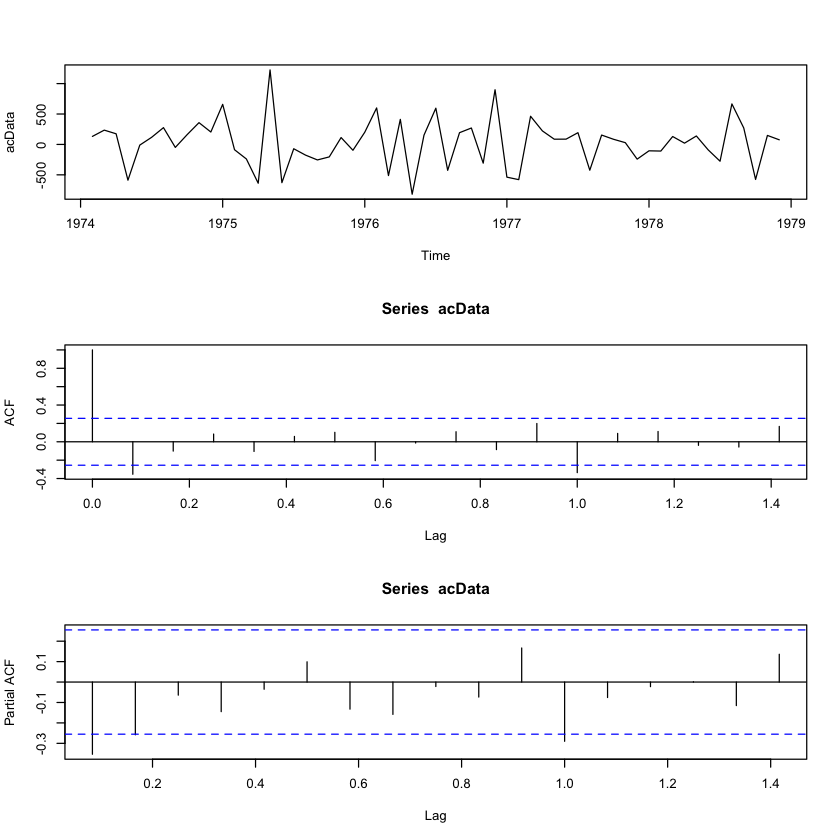

In [3]:
# we de-trend the seasonally differenced time series by taking non-seasonal differencing diff(). 
acData <- diff(diff(USAccDeaths, 12))
par(mfrow=c(3, 1))
plot(acData)
acf(acData)
pacf(acData)

1. Significant adjacent lags in PACF suggest the order of AR terms, $p \leq 2$
2. The significant partial autocorrelation coefficient at lag 12 suggests the order of seasonal AR term, $P\leq 1$
3. Significant adjacent lags in ACF suggest the order of MA terms, $q\leq 1$
4. The significant autocorrelation coefficient at lag12 suggests the order of seasonal MA term. $Q \leq 1$

In [4]:
arima(USAccDeaths, order=c(0, 1, 1), seasonal=list(order=c(0,1,1), period=12))


Call:
arima(x = USAccDeaths, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), 
    period = 12))

Coefficients:
          ma1     sma1
      -0.4303  -0.5528
s.e.   0.1228   0.1784

sigma^2 estimated as 99347:  log likelihood = -425.44,  aic = 856.88

$$ (1-B)(1-B^12)X_t = (1-0.4303B)(1-0.5528B^12)Z_t$$
$$ where \  \sigma_z^2 = 99347$$  

$$ X_t = X_{t-1} + X_{t-12} - X_{t-13} + Z_t - 0.4303Z_{t-1} - 0.5528 Z_{t-12} + 0.2379 Z_{t-13} $$
$$ where \  \sigma_z^2 = 99347$$  


initial  value 5.968253 
iter   2 value 5.813501
iter   3 value 5.809452
iter   4 value 5.805777
iter   5 value 5.805632
iter   6 value 5.805618
iter   7 value 5.805618
iter   7 value 5.805618
iter   7 value 5.805618
final  value 5.805618 
converged
initial  value 5.796764 
iter   2 value 5.792329
iter   3 value 5.791962
iter   4 value 5.791909
iter   4 value 5.791909
iter   4 value 5.791909
final  value 5.791909 
converged


,Estimate,SE,t.value,p.value
ma1,-0.4303,0.1228,-3.5037,9e-04
sma1,-0.5528,0.1784,-3.0991,3e-03


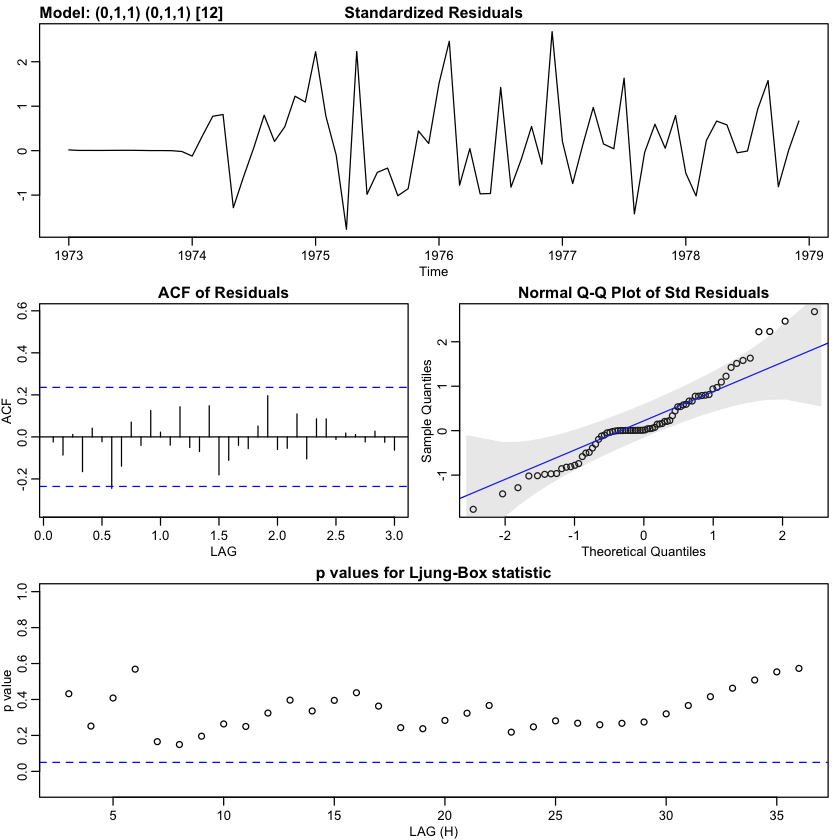

In [5]:
library(astsa)

model<-sarima(USAccDeaths, 0,1,1,0,1,1,12)
model$ttable


1. p-value are 0.0008 and 0.0028 for MA and seasonal MA coefficients, respectively. The fact that they are both less than any reasonable significant level, both coefficients (terms) are significant. 

ERROR while rich displaying an object: Error in arr_partition(a, rows, cols): rows >= 2L is not TRUE

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. r

$pred
          Jan      Feb      Mar
1979 8336.061 7531.829 8314.644

$se
          Jan      Feb      Mar
1979 315.4481 363.0056 405.0168


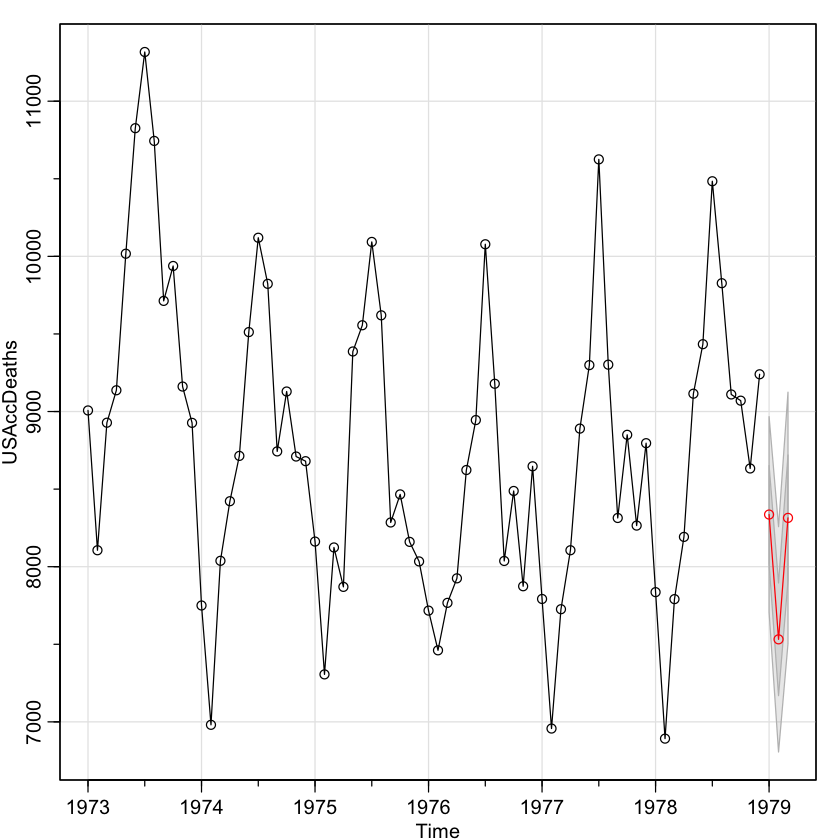

In [9]:
# look for prediction of next 3 month
sarima.for(USAccDeaths,3, 0,1,1,0,1,1,12)